In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("dta/WorldBankData.csv")
df.head()

,Country.Name,Country.Code,Years.of.Compulsory.Education,Health.Expenditure.per.capita,Diabetes.Prevalence,GDP.per.capita.PPP,Tertiary.Education.Expenditure.per.student,Human.Capital.Index,Life.Expectancy.at.birth,Population
0,Afghanistan,AFG,9.0,162.781158,9.59,1934.636754,NaN,0.389,64.047,36296400.0
1,Albania,ALB,9.0,759.666984,10.08,12930.067676,14.802850,0.621,78.495,2873457.0
2,Algeria,DZA,10.0,998.153754,6.73,15266.485208,NaN,0.523,76.293,41389198.0
3,Andorra,AND,10.0,4978.706602,7.97,NaN,23.657301,NaN,NaN,77001.0
4,Angola,AGO,6.0,185.820401,3.94,6650.584940,NaN,0.361,61.809,29816748.0


In [26]:
print(df.shape[0])

258


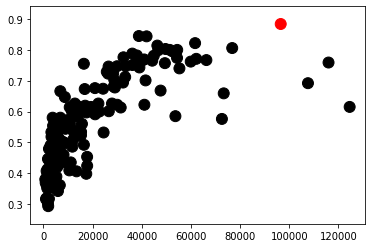

In [3]:
# Q3a
import numpy as np
colors  = np.where(df["Country.Name"] == 'Singapore','r','k')
plt.scatter(df["GDP.per.capita.PPP"] ,  df["Human.Capital.Index"] , s=120, c=colors)


### Q3a: Start off by plotting Human.Capital.Index (on the y-axis) versus GDP.per.capita.PPP on the x-axis. What do you notice? What type of relationship exists between the two variables? Is it linear? (4 points)
It is kind of Quadratic or exponential  function
Positive relationship, variance gets larger when "GDP.per.capita.PPP" get larger
It is not linear

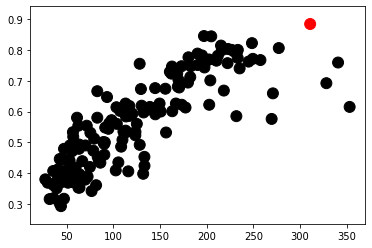

In [5]:
# Q3b
df['GDP.per.capita.PPP.0.5'] = df['GDP.per.capita.PPP'].apply(lambda x: x**0.5)
plt.scatter(df['GDP.per.capita.PPP.0.5'] , df['Human.Capital.Index'], s=120,c = colors) 

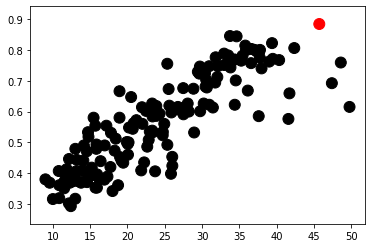

In [6]:
# Q3b
df['GDP.per.capita.PPP.0.333'] = df['GDP.per.capita.PPP'].apply(lambda x: x**0.333)
plt.scatter(df['GDP.per.capita.PPP.0.333'] , df['Human.Capital.Index'], s=120,c = colors) 

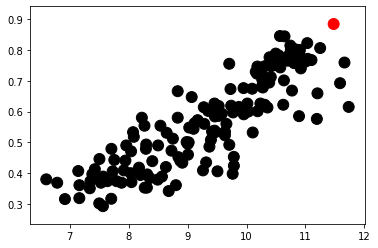

In [7]:
# Q3b
df['GDP.per.capita.PPP.log'] = df['GDP.per.capita.PPP'].apply(lambda x:np.log(x))
plt.scatter(df['GDP.per.capita.PPP.log'] , df['Human.Capital.Index'], s=120,c = colors) 

### Q3b What type of transformation could you apply? Try a few functions that were shown in class: xˆ2, xˆ3, ..., exp(x), log10(x). Make a plot that shows a linear relationship, and describe what you did. (4 points)
### For fun: add code into your plot to highlight the dot that represents Singapore. (1 point)
Singapore has been highlighted in red color
we've tried x^0.5, x^0.333, log(x) , and find out log(x) and x^0.333 have a linear relationship 

In [10]:
# Missing data counts for each column
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 13 columns):
Country.Name                                  258 non-null object
Country.Code                                  258 non-null object
Years.of.Compulsory.Education                 236 non-null float64
Health.Expenditure.per.capita                 230 non-null float64
Diabetes.Prevalence                           253 non-null float64
GDP.per.capita.PPP                            239 non-null float64
Tertiary.Education.Expenditure.per.student    50 non-null float64
Human.Capital.Index                           157 non-null float64
Life.Expectancy.at.birth                      244 non-null float64
Population                                    257 non-null float64
GDP.per.capita.PPP.0.5                        239 non-null float64
GDP.per.capita.PPP.0.333                      239 non-null float64
GDP.per.capita.PPP.log                        239 non-null float64
dtypes: float64(11), object

In [33]:
# Q3c
# log(x)
df_temp = df[["GDP.per.capita.PPP.log",'Human.Capital.Index', 'Country.Name']]
Y = df_temp["Human.Capital.Index"]
X = df_temp["GDP.per.capita.PPP.log"]
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X, missing='drop').fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     Human.Capital.Index   R-squared:                       0.746
Model:                             OLS   Adj. R-squared:                  0.744
Method:                  Least Squares   F-statistic:                     455.2
Date:                 Sat, 06 Feb 2021   Prob (F-statistic):           5.57e-48
Time:                         16:17:08   Log-Likelihood:                 181.48
No. Observations:                  157   AIC:                            -359.0
Df Residuals:                      155   BIC:                            -352.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const             

In [35]:
# Q3c
# x^0.333
df_temp = df[["GDP.per.capita.PPP.0.333",'Human.Capital.Index', 'Country.Name']]
Y = df_temp["Human.Capital.Index"]
X = df_temp["GDP.per.capita.PPP.0.333"]
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X, missing='drop').fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     Human.Capital.Index   R-squared:                       0.732
Model:                             OLS   Adj. R-squared:                  0.731
Method:                  Least Squares   F-statistic:                     423.9
Date:                 Sat, 06 Feb 2021   Prob (F-statistic):           3.34e-46
Time:                         16:17:39   Log-Likelihood:                 177.34
No. Observations:                  157   AIC:                            -350.7
Df Residuals:                      155   BIC:                            -344.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

### Q3c: Interpret the output of the lm(). What do the coefficients in the first column of output table (i.e. coef- ficients b mentioned in class) mean? Interpret them “in English” and try to make sense of the numbers, even if they might seem weird at first. (4 points)
Based on the R-square value, we chose the log(x) function.
It means that when GDP.per.capita.PPP.log is equal to 0,Human.Capital.Index is equal to -0.4326, on average.

By increasing one unit of GDP.per.capita.PPP.log, Human.Capital.Index increases 0.1068  unit on average.

### How many countries made it into this regression? What happened to the rest? (2 points)
157 countries have been made into this regression. The rest has been dropped by the model due to missing value.

### Interpret the goodness-of-fit R . Write out the hypothesis system of F-test and what conclusion do you draw from F-statistics? (3 points)
For the linear regression model we have, 0.746 of Sum of Squares is explained by Model

F-test indicates how model exsits in rejecting h0.
h0: model coefficients are all equal to 0.
h1: model coefficients is different from each other
Since f-stat number is very high, it means that it is convincing to reject h0.
